<a href="https://colab.research.google.com/github/Nitin22122/DL-Lab/blob/main/MNIST_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Normalise
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#reshape image
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), input_shape=(28,28,1)),
    layers.LeakyReLU(negative_slope=0.1),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3)),
    layers.LeakyReLU(negative_slope=0.1),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.8883 - loss: 0.3648 - val_accuracy: 0.9812 - val_loss: 0.0660
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9875 - val_loss: 0.0437
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9920 - loss: 0.0283 - val_accuracy: 0.9897 - val_loss: 0.0374
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9932 - loss: 0.0224 - val_accuracy: 0.9917 - val_loss: 0.0339
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9898 - val_loss: 0.0397
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9917 - val_loss: 0.0375
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9910 - val_loss: 0.0364
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9971 - loss: 0.0080 - 

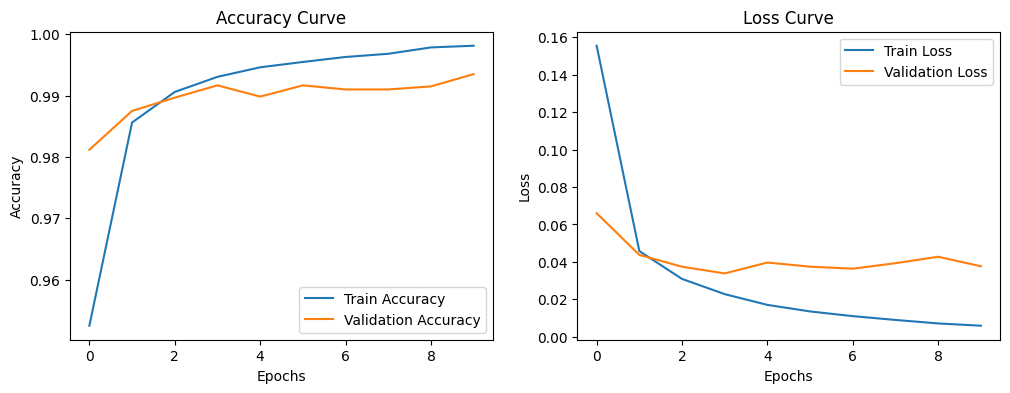

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9887 - loss: 0.0371
Test Accuracy: 0.9921000003814697


In [ ]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
# Generate classification report
report = classification_report(
    y_true,
    y_pred_classes,
    target_names=[str(i) for i in range(10)]
)

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Save model
model.save("mnist_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("mnist_cnn_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/


cameraman.tif  DLAssignment.ipynb  DL_Lab  Image.png  Paint1.png  paint.png


In [ ]:
# Resize to 28x28
img = cv2.resize(img, (28, 28))

# Normalize
img = img / 255.0

# Reshape for CNN → (1, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)


In [ ]:
prediction = model.predict(img)
digit = np.argmax(prediction)

print("Predicted Digit:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Digit: 4
